# User Recommendation - Data Understanding/Exploration

Just few cells to discover data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import read_data, parse_html_tags, word_cloud_generation

/home/okteto/user_recommendation/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
questions = read_data("questions.json")
answers = read_data("answers.json")
users = read_data("users.json")

## Users exploration

In [3]:
users.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,profile_image_url,location,website_url,about_me
0,14417295,charlesispi,2020-10-09 00:59:39.05 UTC,2020-12-05 23:11:51.34 UTC,26,0,0,0,NaN,NaN,NaN,NaN
1,7902365,Pankaj Sanga,2017-04-21 15:38:03.723 UTC,2020-09-04 10:11:58.227 UTC,1,0,0,0,https://www.gravatar.com/avatar/0f7a8b5640aa98...,NaN,NaN,NaN
2,14110073,yanni choongs,2020-08-15 12:40:06.6 UTC,2020-12-05 12:16:59.933 UTC,1,0,0,0,https://lh3.googleusercontent.com/a-/AOh14GjU8...,NaN,NaN,NaN
3,7528825,sodiseng,2017-02-07 12:52:40.24 UTC,2020-12-05 18:53:12.143 UTC,5,0,0,0,https://www.gravatar.com/avatar/e6b8ccde996d22...,Hong Kong,NaN,NaN
4,6087272,Ahmed Wafik,2016-03-19 17:40:05.423 UTC,2020-08-23 15:52:01.54 UTC,46,0,0,0,https://lh3.googleusercontent.com/-akidriZV_0c...,NaN,NaN,NaN


In [4]:
users.count()

id                   138698
display_name         138698
creation_date        138698
last_access_date     138698
reputation           138698
up_votes             138698
down_votes           138698
views                138698
profile_image_url    121165
location              65048
website_url           18116
about_me              35375
dtype: int64

In [5]:
users.dtypes

id                    int64
display_name         object
creation_date        object
last_access_date     object
reputation            int64
up_votes              int64
down_votes            int64
views                 int64
profile_image_url    object
location             object
website_url          object
about_me             object
dtype: object

### Numerical data exploration

In [6]:
users[["reputation","up_votes","down_votes","views"]].describe(percentiles=np.arange(0.1, 1, 0.1))

,reputation,up_votes,down_votes,views
count,1.386980e+05,138698.000000,138698.000000,1.386980e+05
mean,1.886532e+03,139.518046,43.235122,2.522388e+02
std,1.573874e+04,714.389624,801.857004,6.232570e+03
min,1.000000e+00,0.000000,0.000000,0.000000e+00
10%,1.000000e+00,0.000000,0.000000,0.000000e+00
20%,3.000000e+00,0.000000,0.000000,2.000000e+00
30%,1.300000e+01,0.000000,0.000000,4.000000e+00
40%,2.900000e+01,1.000000,0.000000,7.000000e+00
50%,5.400000e+01,3.000000,0.000000,1.200000e+01
60%,1.030000e+02,9.000000,0.000000,2.000000e+01


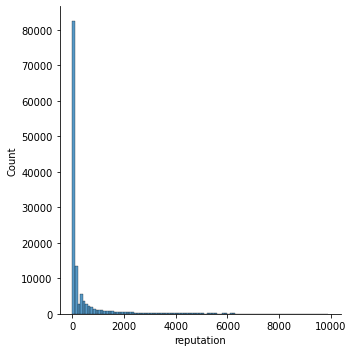

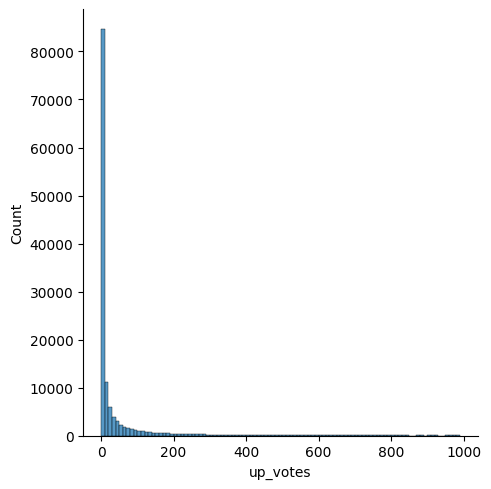

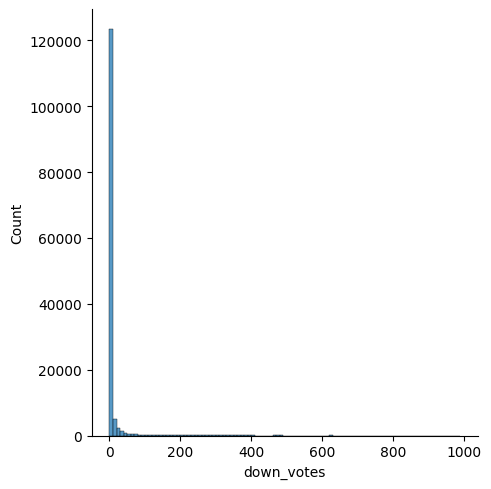

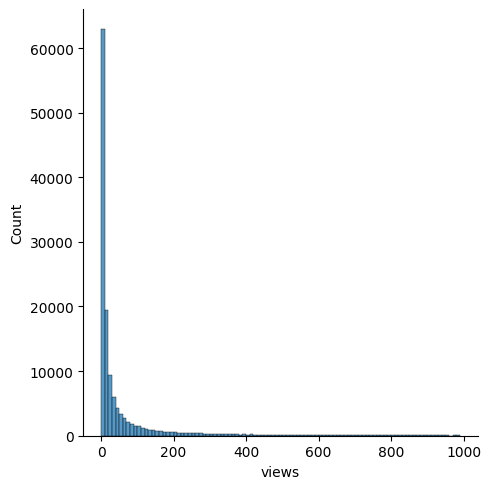

In [7]:
sns.displot(users, x="reputation", bins=np.arange(0, 10000, 100))
sns.displot(users, x="up_votes", bins=np.arange(0, 1000, 10))
sns.displot(users, x="down_votes", bins=np.arange(0, 1000, 10))
sns.displot(users, x="views", bins=np.arange(0, 1000, 10))

### Textual data exploration

In [8]:
users_text = users[["id", "location", "about_me"]]

#### Location

We could see that location is missing at ~50% of time.

Moreover seems to not be normalized and it's a multilingual field.

I think using this information will spend a lot of processing time for a minor improvment.

In [9]:
print("Number of different location", users_text.location.nunique())
print(f"Percent of missing data {int((users_text.location.isna().sum()/users_text.id.count())*100)}%\n")
users_text.location.dropna().sort_values()

Number of different location 11745
Percent of missing data 53%



51945                                            &SquareJAO
12189                            's-Gravenhage, Netherlands
42211                           's-Hertogenbosch, Nederland
88947     (45-sector-gal-23-quad-322) The berdonian galaxy.
93472                                                     -
                                ...                        
11851                                           대한민국 경기도 부천
42998                                               대한민국 대전
113223                                   대한민국 서울특별시 서초구 우면동
33662                                                 반도유보라
126540                                          성남시 구미동 오리역
Name: location, Length: 65048, dtype: object

#### About me

We could see that about_me field is missing at ~75% of time.

It's also multilingual information, a preprocessing removing html tags is required.

It could be a good additional information to identify user skills but could take a lot of time to process correctly, I think it will not use for the first version.

In [10]:
print(f"Percent of missing data {int((users_text.about_me.isna().sum()/users_text.id.count())*100)}%\n")
users_text.about_me.dropna().sort_values()

Percent of missing data 74%



89264                                                     #
106827                                     (currently none)
112202    .Net architect and developer, see <a href="htt...
133570    30 yr old .Net developer based in Cambridgeshi...
128108    <IMG SRC="https://cdn-images-1.medium.com/max/...
                                ...                        
60383                                                   hi!
118481                       http://developingux.com/about/
116589                                             it is me
100625    setName("Gabriel");\n        \n        $me->se...
32101                                           Программист
Name: about_me, Length: 35375, dtype: object

##### Textual data transformation

In [11]:
users_text["about_me_clean"] = users_text.about_me.apply(parse_html_tags)

/home/okteto/user_recommendation/.venv/lib/python3.9/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/home/okteto/user_recommendation/.venv/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/tmp/ipykernel_802/2458655275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_text["about_me_clean"] = users_text.about_me.apply(parse_html_tags)


In [12]:
# Just take a look at some example to see if html tags have been removed
users_text.about_me_clean.loc[[128108, 112202, 100625, 118481]]

128108                                                     
112202    .Net architect and developer, see LinkedIn pro...
100625    setName("Gabriel");\n        \n        $me->se...
118481                       http://developingux.com/about/
Name: about_me_clean, dtype: object

In [13]:
users_text["about_me_len"] = users_text.about_me_clean.fillna("").apply(lambda x: len(x.split(" ")) if x != "" else 0)

/tmp/ipykernel_802/396370644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_text["about_me_len"] = users_text.about_me_clean.fillna("").apply(lambda x: len(x.split(" ")) if x != "" else 0)


##### Distribution of "about_me" lengths

In [14]:
users_text[users_text.about_me_len > 0].about_me_len.describe(percentiles=np.arange(0.1, 1, 0.1))

count    35262.000000
mean        26.332908
std         40.314553
min          1.000000
10%          3.000000
20%          5.000000
30%          7.000000
40%         10.000000
50%         13.000000
60%         18.000000
70%         25.000000
80%         37.000000
90%         62.000000
max       1367.000000
Name: about_me_len, dtype: float64

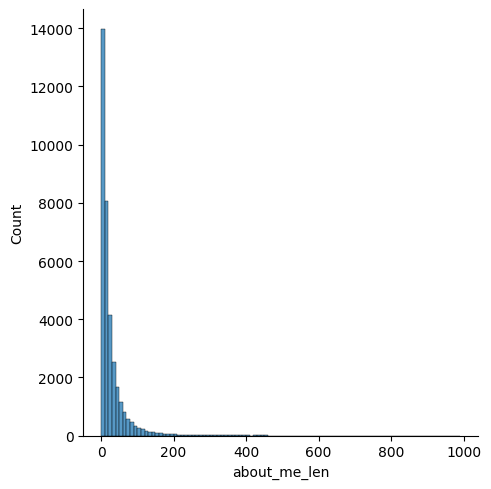

In [15]:
sns.displot(users_text[users_text.about_me_len > 0], x="about_me_len", bins=np.arange(0, 1000, 10))

##### Word Cloud

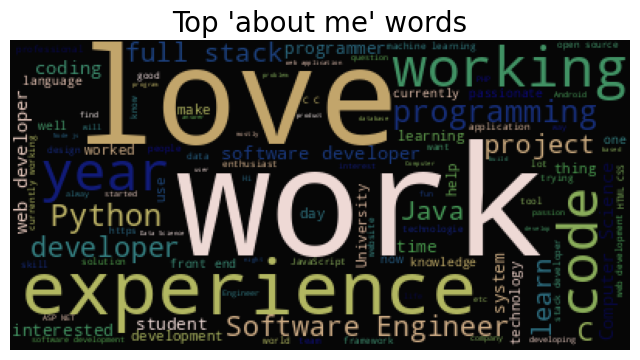

In [16]:
texts=users_text.about_me_clean.dropna().values
word_cloud_generation(texts, "Top 'about me' words", 5000)

## Questions exploration

In [35]:
questions.head()

,question_id,owner_user_id,title,text,date,accepted_answer_id
0,61076766,1418069.0,Spark not closing jdbc connection when Future ...,<p>let's start with what I wish to achieve. Le...,2020-04-07 09:25:23.617,NaN
1,61244258,10091029.0,Get a return value from C++ program to a Pytho...,<p>I am using <code>subprocess.Popen()</code> ...,2020-04-16 06:46:30.973,NaN
2,61139992,11738472.0,bulk download files from microsoft sharepoint,<p>bulk download from share point not download...,2020-04-10 12:12:17.023,NaN
3,61102709,12369140.0,How export and use models in sequelize,"<p>i use sequelize in my node.js project, and ...",2020-04-08 14:08:12.143,NaN
4,61175187,9508751.0,What is an elegant way to animate a Makie.jl p...,<p>Let's say we've got the following Agents.jl...,2020-04-12 17:09:48.310,NaN


In [36]:
questions.count()

question_id           100000
owner_user_id          98846
title                 100000
text                  100000
date                  100000
accepted_answer_id     38769
dtype: int64

### Textual data transformation

In [37]:
# Remove html tags
questions["title_clean"] = questions.title.apply(parse_html_tags)
questions["text_clean"] = questions.text.apply(parse_html_tags)

# Compute the length of text and title
questions["title_len"] = questions.title_clean.apply(lambda x: len(x.split(" ")))
questions["text_len"] = questions.text_clean.apply(lambda x: len(x.split(" ")))

/home/okteto/user_recommendation/.venv/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### Distribution of question textual data lengths

In [38]:
questions.title_len.describe(percentiles=np.arange(0.1, 1, 0.1))

count    100000.000000
mean          9.818550
std           4.047351
min           1.000000
10%           5.000000
20%           6.000000
30%           7.000000
40%           8.000000
50%           9.000000
60%          10.000000
70%          11.000000
80%          13.000000
90%          15.000000
max          32.000000
Name: title_len, dtype: float64

In [39]:
questions.text_len.describe(percentiles=np.arange(0.1, 1, 0.1))

count    100000.000000
mean        300.177500
std         529.304074
min           4.000000
10%          48.000000
20%          69.000000
30%          92.000000
40%         119.000000
50%         152.000000
60%         199.000000
70%         268.000000
80%         385.000000
90%         643.000000
max       18155.000000
Name: text_len, dtype: float64

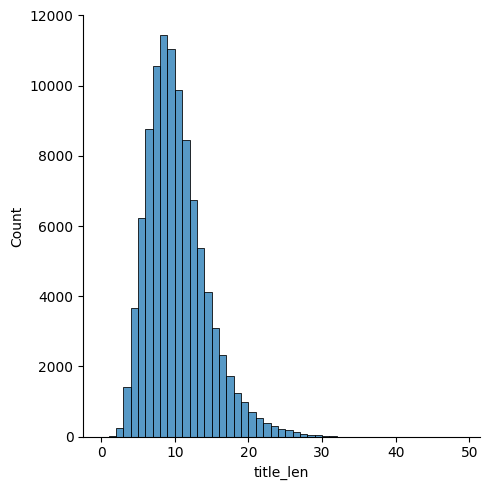

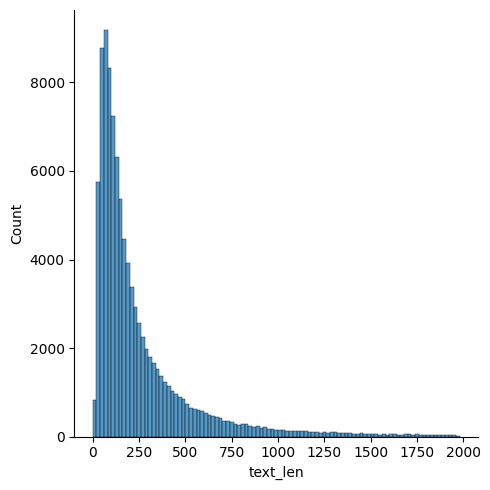

In [40]:
sns.displot(questions, x="title_len", bins=np.arange(0, 50, 1))
sns.displot(questions, x="text_len", bins=np.arange(0, 2000, 20))

#### Word Cloud

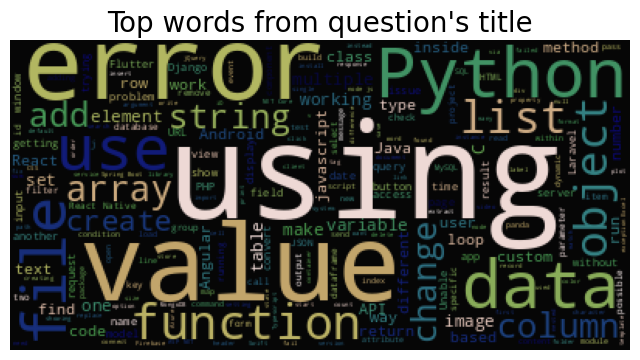

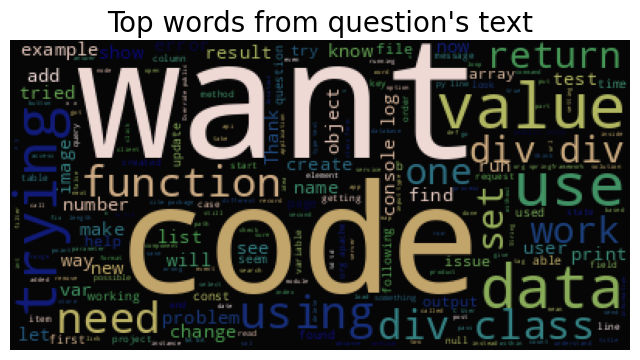

In [23]:
texts = questions.title_clean.values
word_cloud_generation(texts, "Top words from question's title", 10000)
texts = questions.text_clean.values
word_cloud_generation(texts, "Top words from question's text", 10000)

#### Distribution vs accepted answer or not

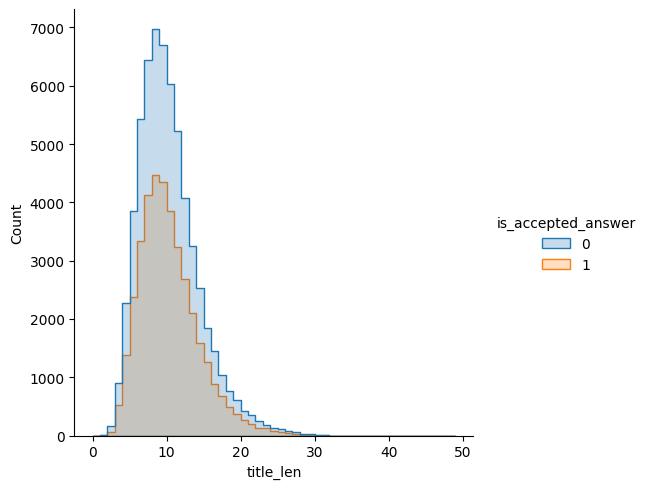

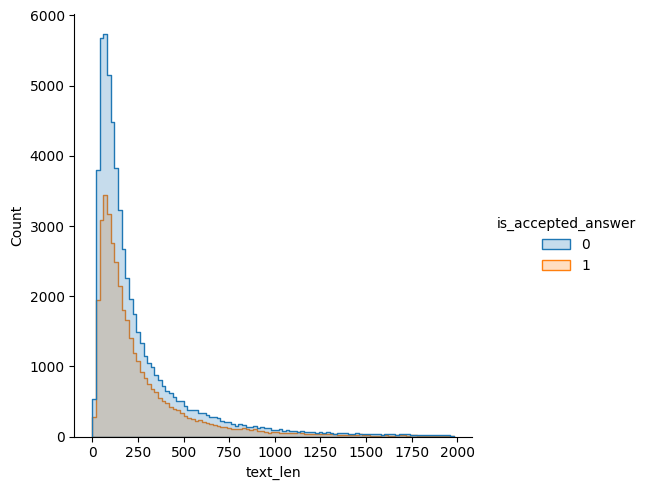

In [41]:
# Transform accepted_answer_id to binary field
questions["is_accepted_answer"] = np.where(questions.accepted_answer_id.isna(),
                                          0,
                                          1) 
sns.displot(questions, x="title_len", hue="is_accepted_answer", bins=np.arange(0, 50, 1), element="step")
sns.displot(questions, x="text_len", hue="is_accepted_answer",bins=np.arange(0, 2000, 20), element="step")

### Study users X questions

In [43]:
print(f"{int((questions.owner_user_id.nunique()/users.id.nunique())*100)}% of users have asked a question")

# Transform dataset to have how many questions each user asked
questions_grouped = questions[["owner_user_id", "question_id"]].groupby("owner_user_id").count().reset_index()
questions_grouped.question_id.describe(percentiles=np.arange(0.1, 1, 0.1))

61% of users have asked a question


count    84794.000000
mean         1.165719
std          0.600902
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          2.000000
max         22.000000
Name: question_id, dtype: float64

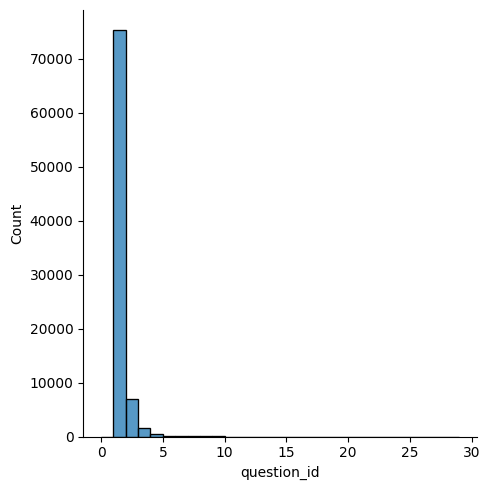

In [26]:
sns.displot(questions_grouped, x="question_id", bins=np.arange(0, 30, 1))

## Answers exploration

In [16]:
answers.head()

,answer_id,user_id,question_id,text,date,score
0,60396014,11993344,60296591,"<p>Found the issue, <code>@park</code> was an ...",2020-02-25 13:41:38.677,0
1,60429061,11993344,60412972,"<p>Can't believe I missed it, the route in my ...",2020-02-27 08:28:36.000,0
2,61809434,12714240,61791601,<p>In the case of using instance group as a ba...,2020-05-15 00:00:06.977,1
3,61117494,11796992,61037929,<p>Maybe the new <code>fetch()</code> hook fro...,2020-04-09 09:01:05.157,0
4,62487887,12191232,62487388,<p>Hello modify you html and css like this</p>...,2020-06-20 15:33:04.643,1


In [17]:
answers.count()

answer_id      95709
user_id        95709
question_id    95709
text           95709
date           95709
score          95709
dtype: int64

### Numeric data exploration

Each answer has a score apply by other users as vote (up or down). It's an interesting feature as it's an answer's rating. 

In [18]:
answers.score.describe(percentiles=[0.05,0.1,0.5,0.7,0.8,0.9,0.92,0.94,0.96,0.98,1])

count    95709.000000
mean         0.770889
std          1.639751
min         -5.000000
5%           0.000000
10%          0.000000
50%          0.000000
70%          1.000000
80%          1.000000
90%          2.000000
92%          2.000000
94%          3.000000
96%          3.000000
98%          4.000000
100%       181.000000
max        181.000000
Name: score, dtype: float64

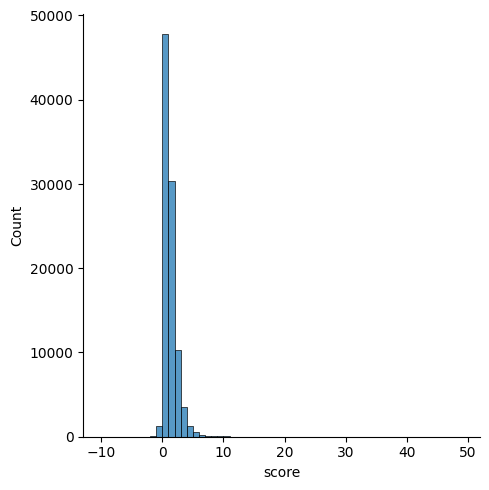

In [19]:
sns.displot(answers, x="score", bins=np.arange(-10, 50, 1))

### Textual data transformation

In [20]:
# Remove html tags
answers["text_clean"] = answers.text.apply(parse_html_tags)
# Compute text length
answers["text_len"] = answers.text_clean.apply(lambda x: len(x.split(" ")))

### Distribution of answers textual data lengths

In [21]:
answers.text_len.describe(percentiles=np.arange(0.1, 1, 0.1))

count    95709.000000
mean       140.717163
std        245.825847
min          1.000000
10%         21.000000
20%         32.000000
30%         45.000000
40%         59.000000
50%         76.000000
60%         99.000000
70%        132.000000
80%        185.000000
90%        299.000000
max      13720.000000
Name: text_len, dtype: float64

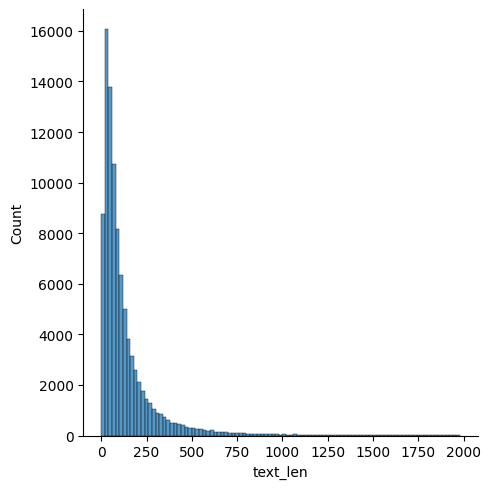

In [22]:
sns.displot(answers, x="text_len", bins=np.arange(0, 2000, 20))

#### Word Cloud

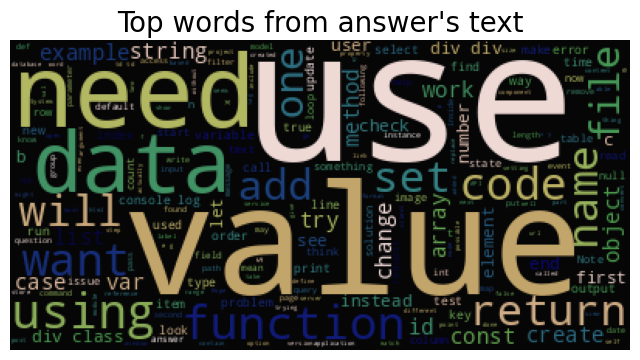

In [34]:
texts = answers.text_clean.values
word_cloud_generation(texts, "Top words from answer's text", 10000)

#### Distribution vs accepted answer or not

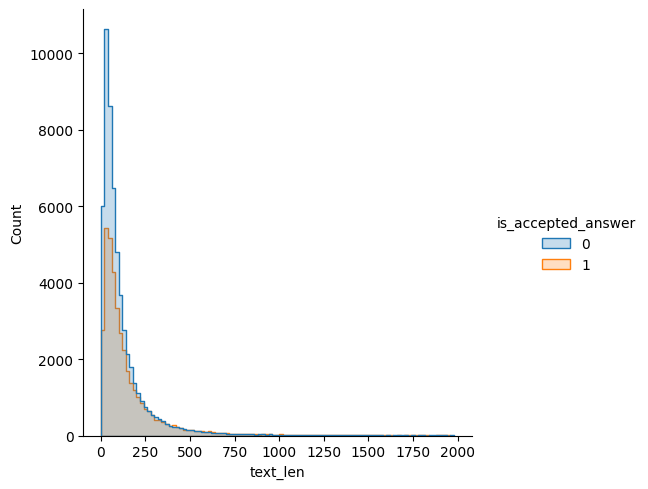

In [23]:
answers_with_validation = answers.merge(questions["accepted_answer_id"], left_on="answer_id", right_on="accepted_answer_id", how="left")
answers_with_validation["is_accepted_answer"] = np.where(answers_with_validation.accepted_answer_id.isna(),
                                          0,
                                          1) 
sns.displot(answers_with_validation, x="text_len", hue="is_accepted_answer",bins=np.arange(0, 2000, 20), element="step")

### Study users X answers

A minority of users have answered to a question: 37%. Means that we expect a **high-sparsity case** and using only interactions between users and questions should perform poorly.

Also a majority of users responding to a question have only 1 answer: ~70%. Means that we have to take care to **cold-start case**.

In [33]:
print(f"{int((answers.user_id.nunique()/users.id.nunique())*100)}% of users have answered to a question")

# Transform dataset to know how many answers posted by users
answers_grouped = answers[["user_id", "answer_id"]].groupby("user_id").count().reset_index()
answers_grouped.answer_id.describe(percentiles=np.arange(0.1, 1, 0.1))

32% of users have answered to a question


count    45471.000000
mean         2.104836
std          6.928262
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          2.000000
90%          3.000000
max        742.000000
Name: answer_id, dtype: float64

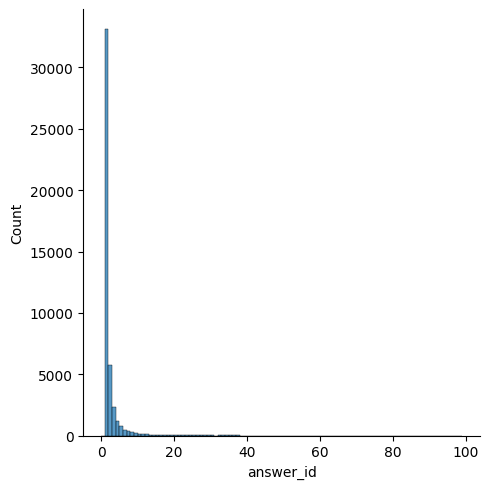

In [13]:
sns.displot(answers_grouped, x="answer_id", bins=np.arange(0, 100, 1))

### Study questions X answers



In [14]:
# Transform dataset to know how many answers posted by users
answers_question = answers[["question_id", "answer_id"]].groupby("question_id").count().reset_index()
answers_question.answer_id.describe(percentiles=np.arange(0.1, 1, 0.1))

count    71036.000000
mean         1.347331
std          0.668545
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          2.000000
90%          2.000000
max         16.000000
Name: answer_id, dtype: float64

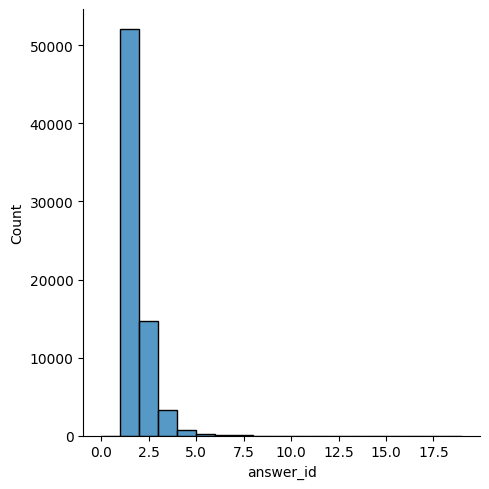

In [16]:
sns.displot(answers_question, x="answer_id", bins=np.arange(0, 20, 1))